# Desafio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msngo
import factor_analyzer as factor
df = pd.read_csv("bfi.csv")
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


# Desafio 2

In [2]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


<AxesSubplot:>

<Figure size 288x288 with 0 Axes>

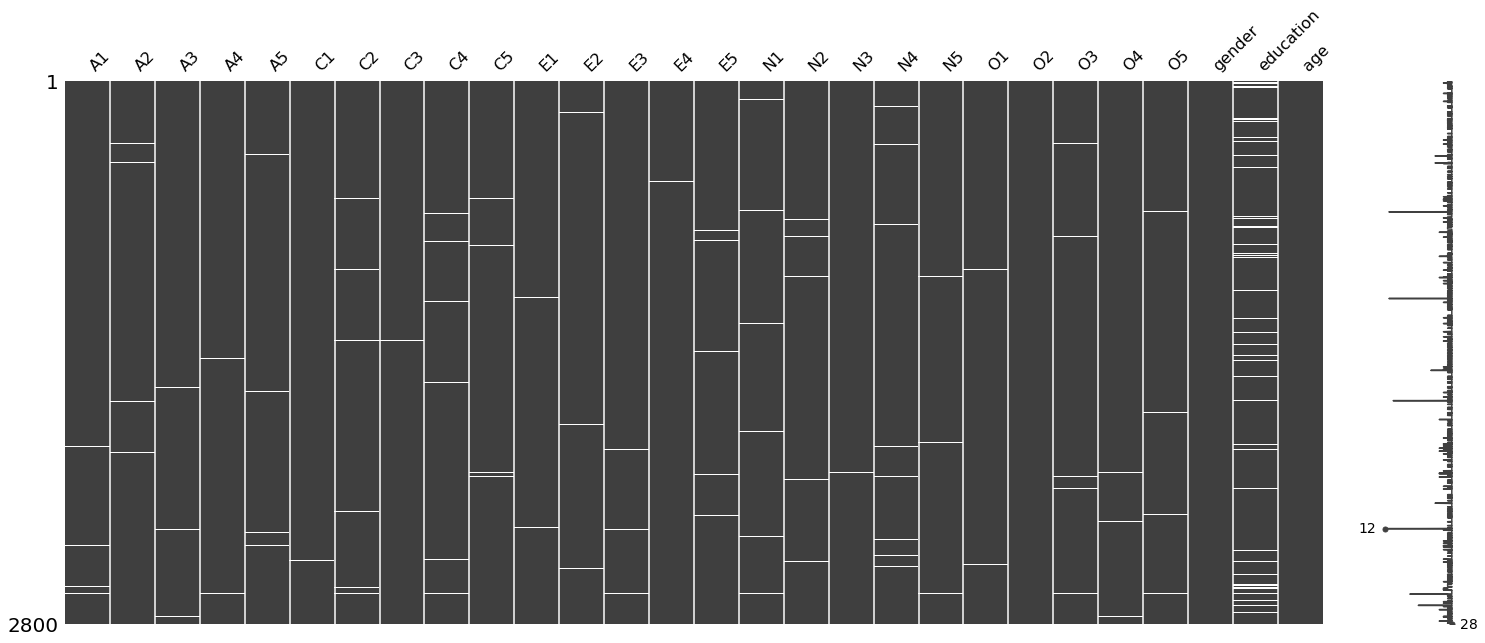

In [3]:
plt.figure(figsize=(4,4))
msngo.matrix(df.replace([8,9],[np.nan, np.nan]))

In [4]:
perdida=df.isna().sum()*100/len(df)
perdida

A1           0.571429
A2           0.964286
A3           0.928571
A4           0.678571
A5           0.571429
C1           0.750000
C2           0.857143
C3           0.714286
C4           0.928571
C5           0.571429
E1           0.821429
E2           0.571429
E3           0.892857
E4           0.321429
E5           0.750000
N1           0.785714
N2           0.750000
N3           0.392857
N4           1.285714
N5           1.035714
O1           0.785714
O2           0.000000
O3           1.000000
O4           0.500000
O5           0.714286
gender       0.000000
education    7.964286
age          0.000000
dtype: float64

Tanto como en missingno con en los porcentajes, se puede ver que education pierde una gran cantidad de datos, siendo el 7% de estos seguido poN4 y N5 con 1%

In [5]:
dfnan=df.dropna()
dfnan=dfnan.astype(int)
dfnan

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6,6,5,6,5,6,6,6,1,3,...,2,3,4,3,5,6,1,2,3,21
7,4,3,1,5,1,3,2,4,2,4,...,6,4,3,2,4,5,3,1,2,19
10,4,4,5,6,5,4,3,5,3,2,...,2,3,5,3,5,6,3,1,1,21
14,4,5,2,2,1,5,5,5,2,2,...,2,3,5,2,5,5,5,1,1,17
22,1,5,6,5,6,4,3,2,4,5,...,2,2,6,1,5,5,2,1,5,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,5,5,5,6,5,6,6,2,4,5,...,3,4,4,5,5,4,4,2,3,22
2793,3,4,3,1,3,5,4,5,3,4,...,5,6,6,1,4,5,2,2,4,24
2797,2,3,5,2,5,5,5,5,1,1,...,3,1,5,1,6,4,3,2,4,29
2798,5,2,2,4,4,5,5,5,2,6,...,4,1,5,2,5,5,1,1,4,31


# Desafio 3

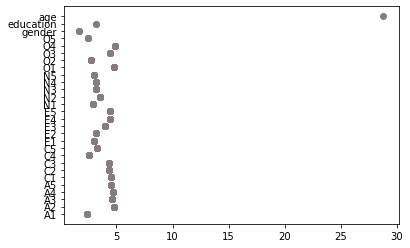

In [6]:
variable = []
mean = []
# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in df.iteritems():
    # guardamos el nombre en variable
    variable.append(colname)
    # calculamos y procesamos la media
    mean.append(serie.mean())
    df = pd.DataFrame({'var':variable, 'mean':mean}).sort_values(by=['mean'])
    plt.plot(df['mean'], df['var'],'o')

<AxesSubplot:>

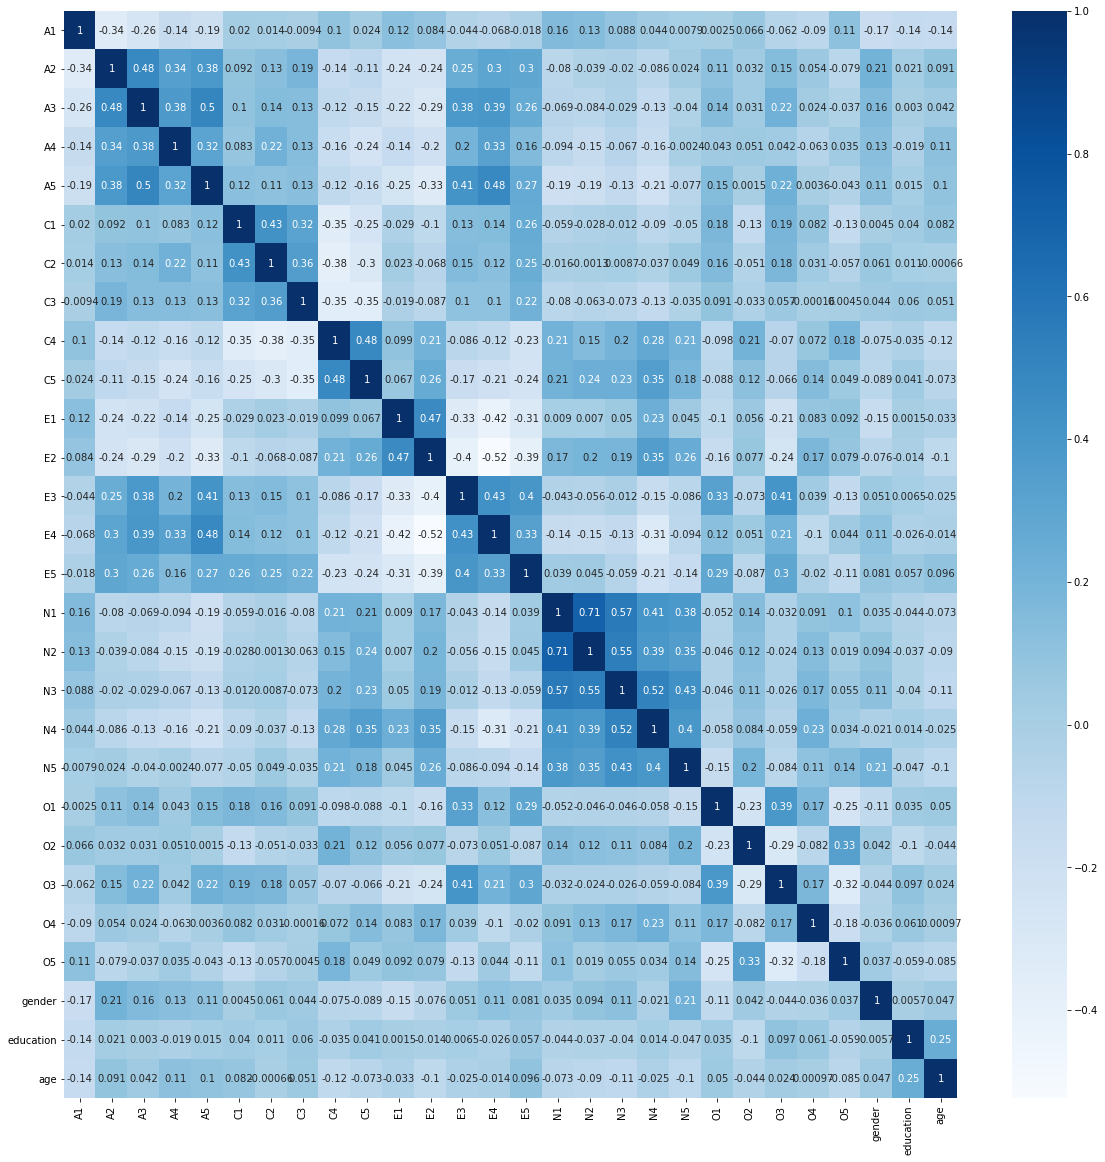

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(dfnan.corr(), cmap='Blues', annot=True)

Se puede observar que hay una fuerte correlacion entre N1, N2, N3. N4 y N5.
Entre A3, A4 y A5 con A2, A3 y A4.
C5 y C4
Entre E4 y E5
E4, E4 con A5
O3 con E3

# Desafio 4

In [8]:
factor.calculate_bartlett_sphericity(dfnan)

(17359.077419745336, 0.0)

Se sugiere que la matriz de correlaciones no es igual a la matriz de identidad. Por lo que se puede seguir con el analisis.

In [9]:
factor.calculate_kmo(dfnan)

(array([0.75129086, 0.84380058, 0.87259439, 0.86196987, 0.89609538,
        0.83302616, 0.78347906, 0.84259756, 0.82855151, 0.85692691,
        0.84543297, 0.88171534, 0.89014498, 0.87432169, 0.89167722,
        0.77258165, 0.77820795, 0.8586007 , 0.87843955, 0.84636179,
        0.85238344, 0.78043226, 0.83381538, 0.78621003, 0.76220566,
        0.71209407, 0.58446076, 0.60850663]),
 0.8385815853066401)

Se sugiere que para seguir, los valores sean superiores a .7
En este caso education y age. Se puede mejorar eliminando estas variables.

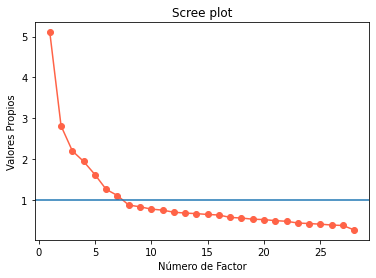

In [10]:
factorize = factor.FactorAnalyzer(n_factors=10,rotation='varimax', rotation_kwargs={})
factorize.fit(dfnan)
factor_eigenvalues=factorize.get_eigenvalues()[0]
plt.plot(np.arange(1,len(factor_eigenvalues)+1), factor_eigenvalues, 'o-',color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot");

In [19]:
factorize2= factor.FactorAnalyzer(n_factors=2,rotation='varimax')
factorize2.fit(dfnan)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [20]:
factorize2.loadings_

array([[-0.20300894,  0.08655215],
       [ 0.53776499,  0.00453659],
       [ 0.60184238, -0.02174766],
       [ 0.41019474, -0.10310708],
       [ 0.57943863, -0.14788892],
       [ 0.31828565, -0.08384398],
       [ 0.33889569, -0.02941904],
       [ 0.28630701, -0.12871129],
       [-0.31394049,  0.32663422],
       [-0.32731367,  0.3624038 ],
       [-0.45546398,  0.05061097],
       [-0.5482156 ,  0.27730308],
       [ 0.62655879, -0.02191324],
       [ 0.60614419, -0.16167763],
       [ 0.59020615, -0.04807927],
       [-0.0206291 ,  0.74976504],
       [-0.01317651,  0.73419279],
       [ 0.00339357,  0.755197  ],
       [-0.23443799,  0.61416372],
       [-0.05449591,  0.55660166],
       [ 0.33350788, -0.05757556],
       [-0.10028838,  0.18664339],
       [ 0.43566339, -0.01603759],
       [ 0.03956334,  0.21746835],
       [-0.17035785,  0.08757566],
       [ 0.19981005,  0.11687249],
       [ 0.04188836, -0.04587035],
       [ 0.09914778, -0.12233965]])

In [21]:
loading_df=pd.DataFrame(factorize2.loadings_,columns=['Factor1','Factor2'],index=dfnan.columns)

loading_df

,Factor1,Factor2
A1,-0.203009,0.086552
A2,0.537765,0.004537
A3,0.601842,-0.021748
A4,0.410195,-0.103107
A5,0.579439,-0.147889
C1,0.318286,-0.083844
C2,0.338896,-0.029419
C3,0.286307,-0.128711
C4,-0.313940,0.326634
C5,-0.327314,0.362404


<AxesSubplot:>

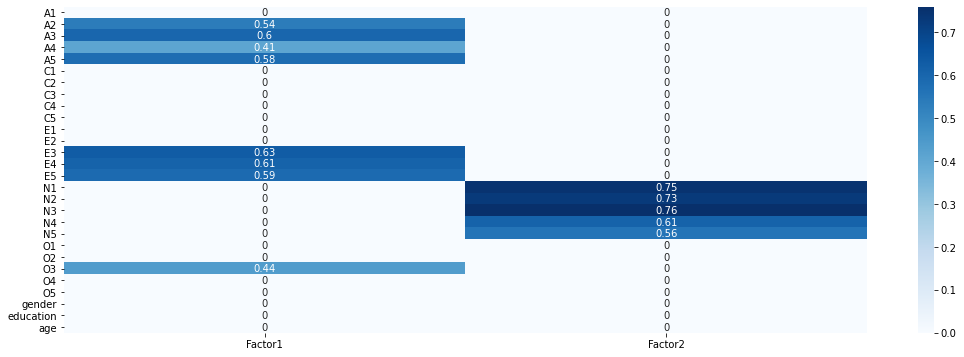

In [22]:
plt.figure(figsize=(18,6))
factor_loadings=loading_df.applymap(lambda x: np.where(x < .4, 0, round(x,2)))
sns.heatmap(factor_loadings,cmap='Blues', annot=True)

El factor 2 esta capturando el grado de desconfianza de todas las preguntas N, que se refiere más a emociones negativas.

# Desafio 5

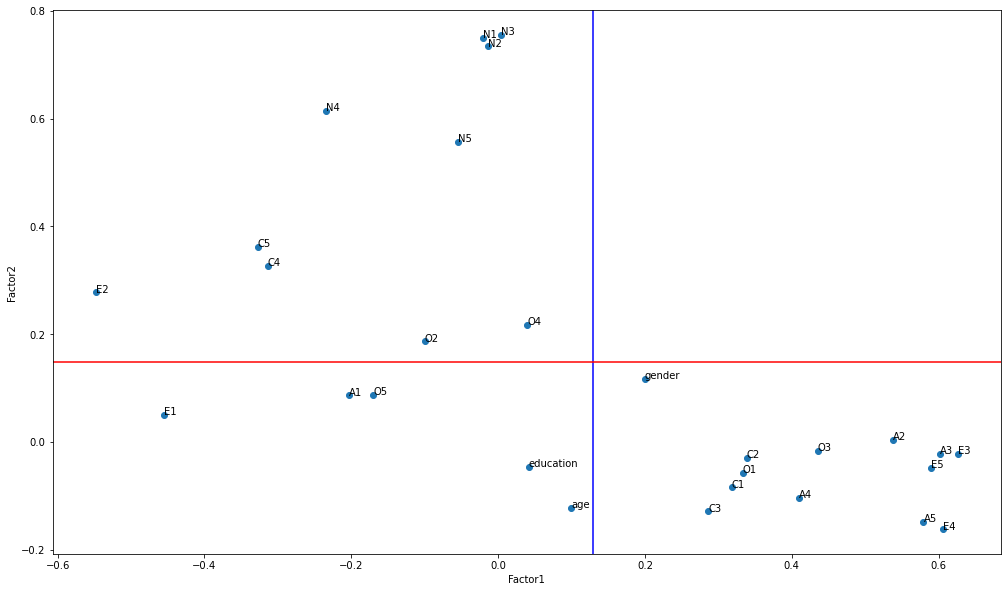

In [24]:
plt.figure(figsize=(17,10))
plt.plot(loading_df.Factor1, loading_df.Factor2, "o")
plt.xlabel("Factor1")
plt.ylabel("Factor2")

for i, text in enumerate (loading_df.index):
    plt.annotate(text,(loading_df["Factor1"][i], loading_df["Factor2"][i]))
    
plt.axvline(loading_df["Factor1"].mean(), color="blue")
plt.axhline(loading_df["Factor2"].mean(), color="red")

Se ve una tendencia negativa en que grados altos de la media de carga implica tambien grados bajos la media

In [29]:
model=smf.ols('gender ~ education + age', dfnan)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gender   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.512
Date:                Mon, 24 Jan 2022   Prob (F-statistic):             0.0813
Time:                        18:31:15   Log-Likelihood:                -1480.8
No. Observations:                2236   AIC:                             2968.
Df Residuals:                    2233   BIC:                             2985.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6167      0.037     43.931      0.000       1.545       1.689
education     -0.0027      0.009     -0.292      0.771      -0.021       0.015
age            0.0021      0.001      2.225      0.026       0.000       0.004
==============================================================================
Omnibus:                    16736.903   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.926
Skew:                          -0.727   Prob(JB):                     1.06e-86
Kurtosis:                       1.538   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

education y age explican en un 0,2% de gender
